In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Read the dataset
data = pd.read_csv(r'/Users/aceboogie/Desktop/churn_clean.csv')

# Internet service types
internet_service_types = ['Fiber Optic', 'DSL', 'None']

for service_type in internet_service_types:
    # Filter data based on Internet service type
    data_filtered = data[data['InternetService'] == service_type]
    
    # T-test
    # Comparing average monthly charges between churned and non-churned customers for each Internet service type
    churned = data_filtered[data_filtered['Churn'] == 'Yes']
    non_churned = data_filtered[data_filtered['Churn'] == 'No']
    t_stat, p_value_ttest = ttest_ind(churned['MonthlyCharge'], non_churned['MonthlyCharge'], equal_var=False)
    print(f"\nT-test result for {service_type}:")
    print(f"T-stat: {t_stat}, p-value: {p_value_ttest}")



T-test result for Fiber Optic:
T-stat: 28.004978114618194, p-value: 2.146081491051607e-142

T-test result for DSL:
T-stat: 26.02406957782066, p-value: 2.0412314804883968e-128

T-test result for None:
T-stat: 19.52096009875324, p-value: 1.111904441468515e-69


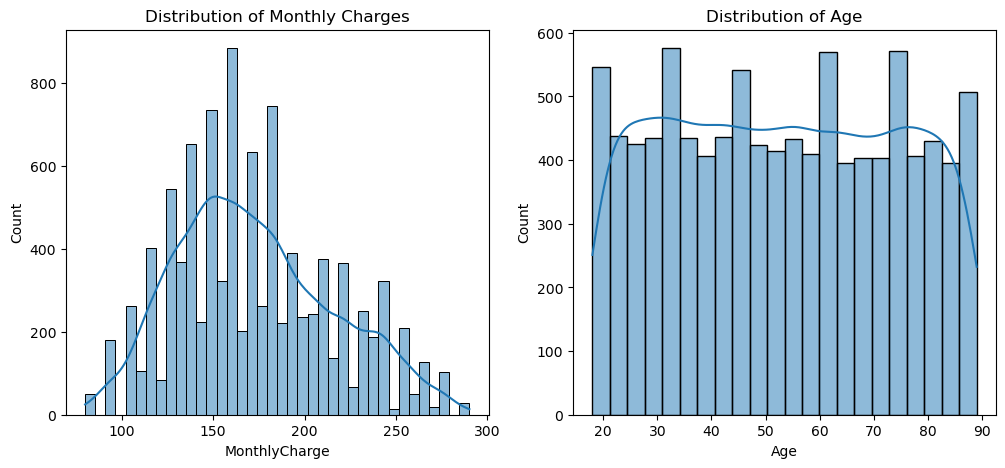

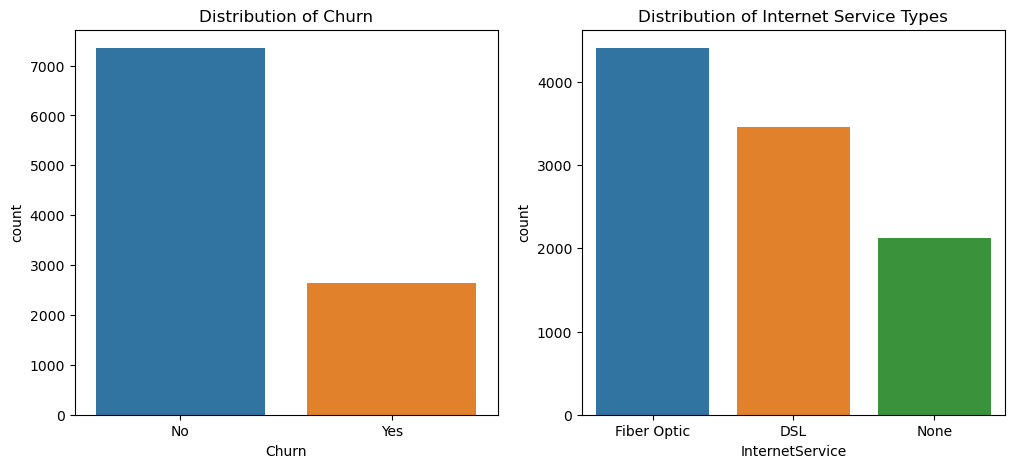

In [7]:
# Continuous variables: 'MonthlyCharge' and 'Age'
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data['MonthlyCharge'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Monthly Charges')

sns.histplot(data['Age'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Age')

plt.show()

# Categorical variables: 'Churn' and 'InternetService'
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x='Churn', data=data, ax=axes[0])
axes[0].set_title('Distribution of Churn')

sns.countplot(x='InternetService', data=data, ax=axes[1])
axes[1].set_title('Distribution of Internet Service Types')

plt.show()

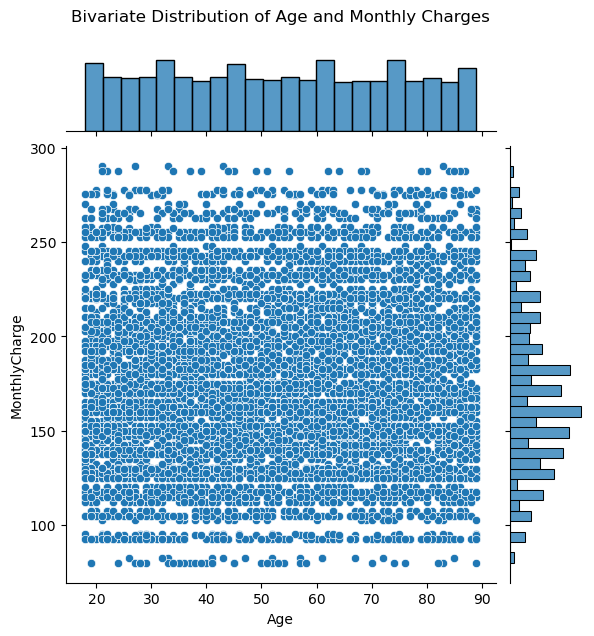

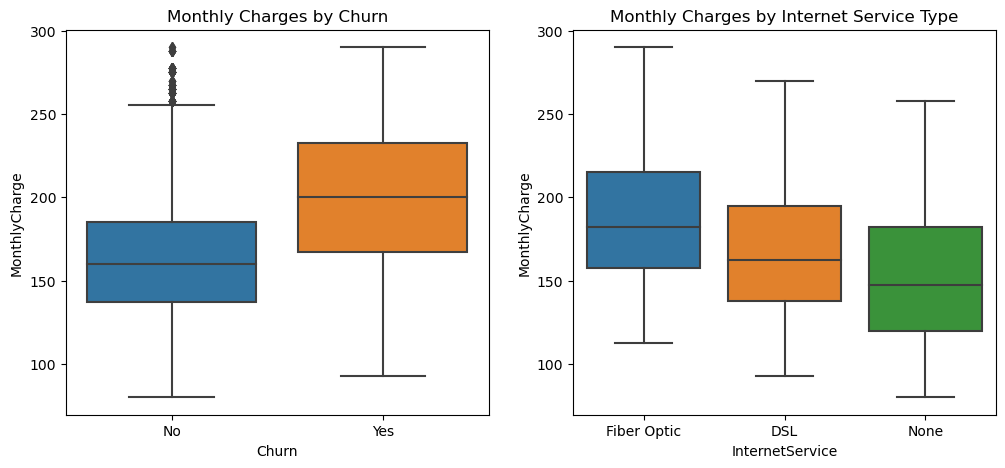

In [8]:
# Continuous variables: 'MonthlyCharge' and 'Age'
sns.jointplot(x='Age', y='MonthlyCharge', data=data)
plt.title('Bivariate Distribution of Age and Monthly Charges', pad=90)
plt.show()

# Categorical variables: 'Churn' and 'InternetService'
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x='Churn', y='MonthlyCharge', data=data, ax=axes[0])
axes[0].set_title('Monthly Charges by Churn')

sns.boxplot(x='InternetService', y='MonthlyCharge', data=data, ax=axes[1])
axes[1].set_title('Monthly Charges by Internet Service Type')

plt.show()
